In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movies.csv')


In [4]:
# Now let's take a look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [10]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing
for col in df.columns :
    percent = df[col].isnull().mean()
    print(col,percent,'%')

budget 0.0 %
company 0.0 %
country 0.0 %
director 0.0 %
genre 0.0 %
gross 0.0 %
name 0.0 %
rating 0.0 %
released 0.0 %
runtime 0.0 %
score 0.0 %
star 0.0 %
votes 0.0 %
writer 0.0 %
year 0.0 %


##### Simple method to check missing values in the df

In [6]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [11]:
# Data Types for our columns
df.dtypes


budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [17]:

df[['budget','gross']] = df[['budget','gross']].astype('int64')
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [31]:
# correct the year column since the year of release is not matcching the releaased column.
df.released = pd.to_datetime(df.released)
df['correct_year'] = df.released.dt.year
df.head()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [37]:
#view the movies with biggest gross
df.sort_values('gross').tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015


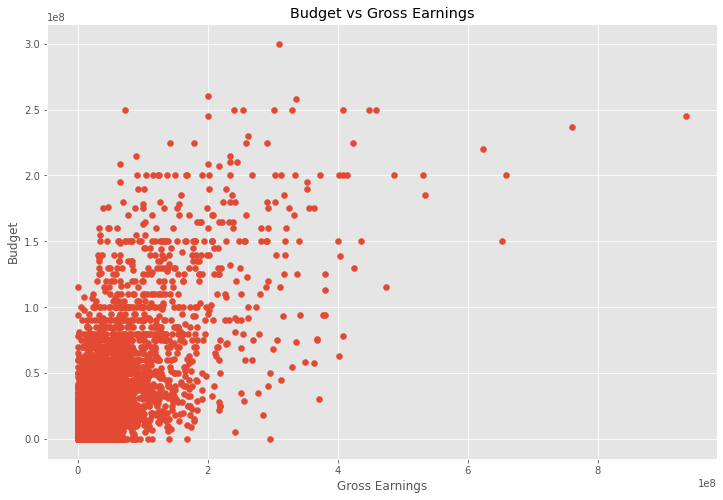

In [41]:
# check the correlation between gross vs budget using scatter plot.
plt.scatter(x = df.gross, y = df.budget)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')


plt.show()


<AxesSubplot:xlabel='gross', ylabel='budget'>

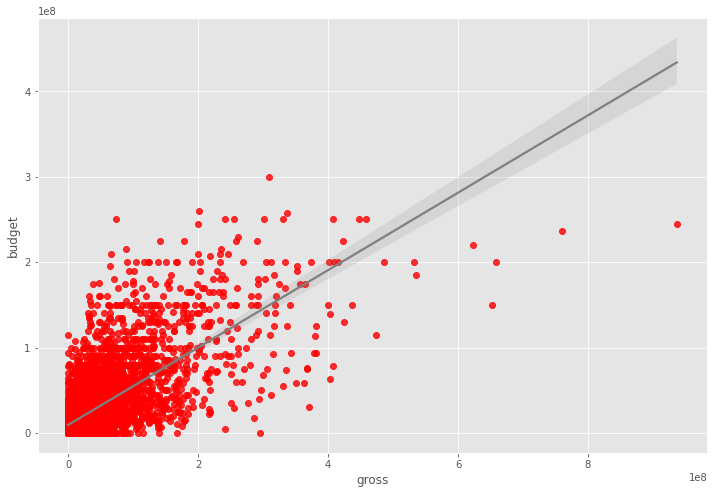

In [44]:
# Plot budget vs gross using seaborn

sns.regplot(data = df, x = 'gross', y = 'budget',scatter_kws ={'color' : 'red'}, line_kws ={'color': 'grey'})


In [47]:
# Correlation Matrix between all numeric columns
correlation_matrix = df.corr()
df.corr()

,budget,gross,runtime,score,votes,year,correct_year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
correct_year,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


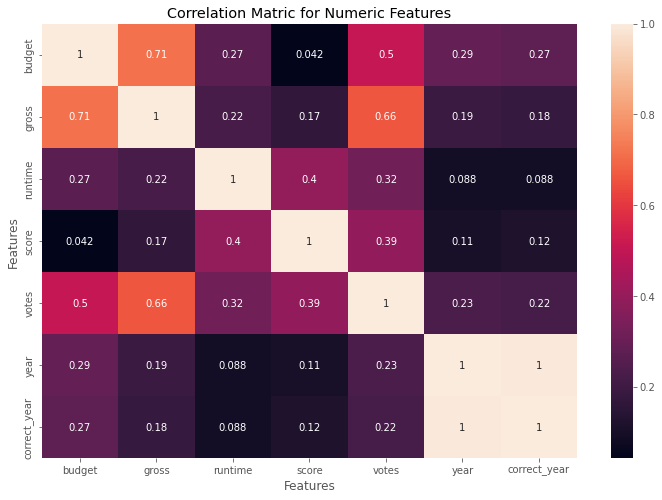

In [54]:
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

,budget,gross,runtime,score,votes,year,grosstotal,countrygrosstotal
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553,0.035936,NaN
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467,-0.076909,NaN
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902,-0.092817,NaN
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598,-0.083826,NaN
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588,-0.045118,NaN
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000,0.062077,NaN
grosstotal,0.035936,-0.076909,-0.092817,-0.083826,-0.045118,0.062077,1.000000,NaN
countrygrosstotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


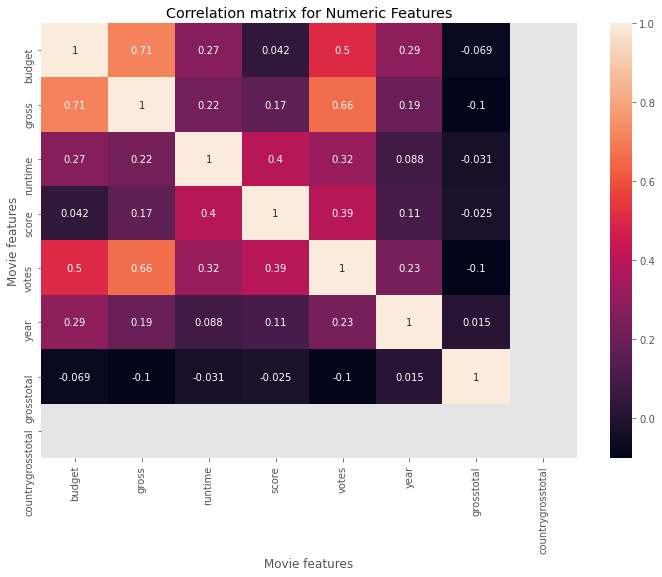

In [56]:
df_numerized = df
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [59]:
# Using factorize - this assigns a random numeric value for each unique categorical value
for col in df_numerized.columns :
    if df_numerized[col].dtype == 'object' :
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,correct_year
0,8000000,665,54,2192,1,52287414,4661,8,1986-08-22,89,8.1,2454,299174,3716,1986,1986
1,6000000,1680,54,1296,4,70136369,1821,7,1986-06-11,103,7.8,1605,264740,1970,1986,1986
2,15000000,1680,54,2645,0,179800601,6203,6,1986-05-16,110,6.9,2345,236909,1852,1986,1986
3,18500000,2062,54,1066,0,85160248,295,8,1986-07-18,137,8.4,2192,540152,1629,1986,1986
4,9000000,2122,54,2123,1,18564613,1872,6,1986-08-01,90,6.9,1139,36636,2549,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2016-07-22,91,5.4,1066,9161,1800,2016,2016
6816,0,1914,54,1989,6,28368,3430,7,2016-05-06,90,4.9,2146,1959,3008,2016,2016
6817,3500000,2124,54,2313,2,3775000,577,8,2016-07-25,76,6.5,1355,36333,450,2016,2016
6818,0,415,54,1914,6,25981,5272,8,2016-12-02,76,6.2,1370,6947,2946,2016,2016


In [62]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,correct_year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.268226,0.042145,-0.015062,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003699,-0.042793,0.149988,0.025020,0.057979,-0.081796,-0.174414,-0.014569,0.078657,0.024982,-0.045204,-0.062707
director,0.011602,0.004320,0.003699,1.000000,-0.027669,-0.011429,0.001906,0.021926,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000087,0.001823
genre,-0.346794,-0.068330,-0.042793,-0.027669,1.000000,-0.242676,0.018062,0.100960,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.224579,0.165693,0.008381,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001906,0.018062,0.022768,1.000000,0.001289,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001289,1.000000,0.079542,0.019271,0.007891,0.011678,0.010741,0.016221,0.017438
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342
score,0.042145,-0.010426,-0.174414,0.017130,0.056234,0.165693,0.023342,0.019271,0.395343,1.000000,0.009483,0.393607,0.012223,0.105276,0.117679


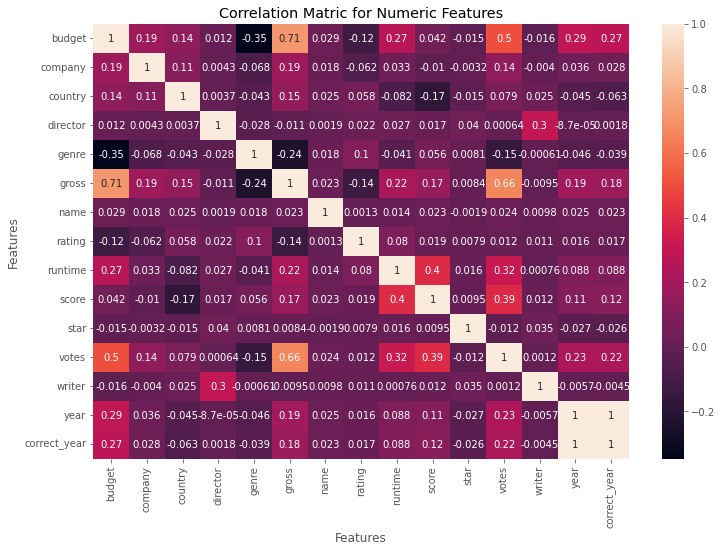

In [61]:
sns.heatmap(df_numerized.corr(), annot = True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [70]:
cor_mat_pairs = df_numerized.corr().unstack()
cor_mat_pairs

budget        budget          1.000000
              company         0.187205
              country         0.137635
              director        0.011602
              genre          -0.346794
                                ...   
correct_year  star           -0.026052
              votes           0.220797
              writer         -0.004546
              year            0.996229
              correct_year    1.000000
Length: 225, dtype: float64

In [75]:
cor_mat_pairs.sort_values()

genre         budget         -0.346794
budget        genre          -0.346794
genre         gross          -0.242676
gross         genre          -0.242676
score         country        -0.174414
                                ...   
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
correct_year  correct_year    1.000000
Length: 225, dtype: float64

In [77]:
# We can now take a look at the ones that have a high correlation (> 0.5)

cor_mat_pairs[cor_mat_pairs > 0.5]

budget        budget          1.000000
              gross           0.712196
              votes           0.503924
company       company         1.000000
country       country         1.000000
director      director        1.000000
genre         genre           1.000000
gross         budget          0.712196
              gross           1.000000
              votes           0.662457
name          name            1.000000
rating        rating          1.000000
runtime       runtime         1.000000
score         score           1.000000
star          star            1.000000
votes         budget          0.503924
              gross           0.662457
              votes           1.000000
writer        writer          1.000000
year          year            1.000000
              correct_year    0.996229
correct_year  year            0.996229
              correct_year    1.000000
dtype: float64

In [79]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
2123    21322318408
2085    19430051320
1680    17115702495
2062    14788570587
2122    10455507123
664      8824216545
1582     8540112287
665      7720114061
2041     6688156475
821      5458121021
822      4143974397
1515     3384812932
1720     3242024778
1011     3113861473
2050     2967117827
Name: gross, dtype: int64